# Les quatres chevelures

*Rappel :*
On se retrouve dans une situation où 4 personnes se voit appliquer une teinture de cheveux **ORANGE** ou **INDIGO**
Chaque personne ne peut voir que les chevelure des personnes suivantes
Les personnes doivent cahcun leur tour ennoncer leur couleur de cheveux en un seul mot

*Au préalable:*
Les personnes se sont consulté pour que la premiere personne dise **ORANGE** si il voit un nombre pair de cheveux Indigo
et **INDIGO** si il voit un nombre inpair de cheveux Indigo

On definis ici 0 pour Orange ou pair
et 1 pour Indigo ou impair

In [1]:
#librairie necessaire
import numpy as np
from qiskit import *

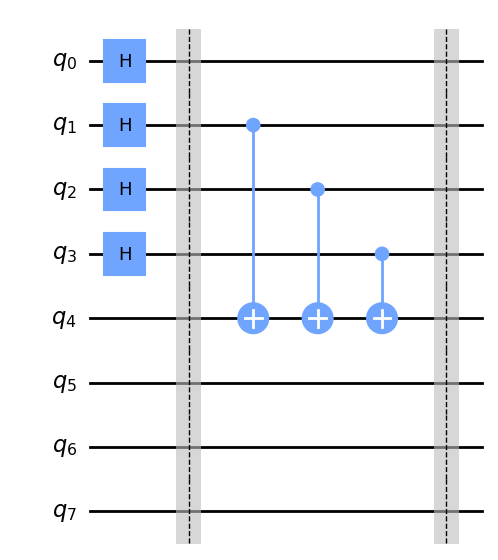

In [2]:
# on créer un circuit de 8 Qbit, deux par paticipant pour reppresanter sa couleur et sa reponse
enig = QuantumCircuit(8) 

# on met une porte Hadamard sur les 4 personnes pour définir aléatoirement leur couleur
enig.h(0)
enig.h(1)
enig.h(2)
enig.h(3)



enig.barrier()

# on fait une porte CNOT de chaque participant sauf le premier pour representer ce qu'il voit et donc en definir ca reponse
enig.cx(1,4)
enig.cx(2,4)
enig.cx(3,4)


enig.barrier()
enig.draw('mpl')

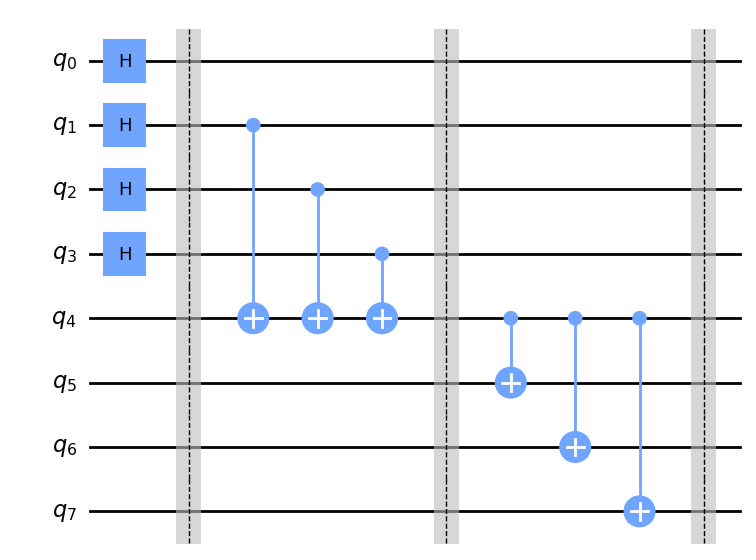

In [3]:
# on fait une porte CNOT de la reponse du premier sur la reponse des autres participant pour signifie le partage de l'information donner par le premier participant
enig.cx(4,5)
enig.cx(4,6)
enig.cx(4,7)

enig.barrier()
enig.draw('mpl')

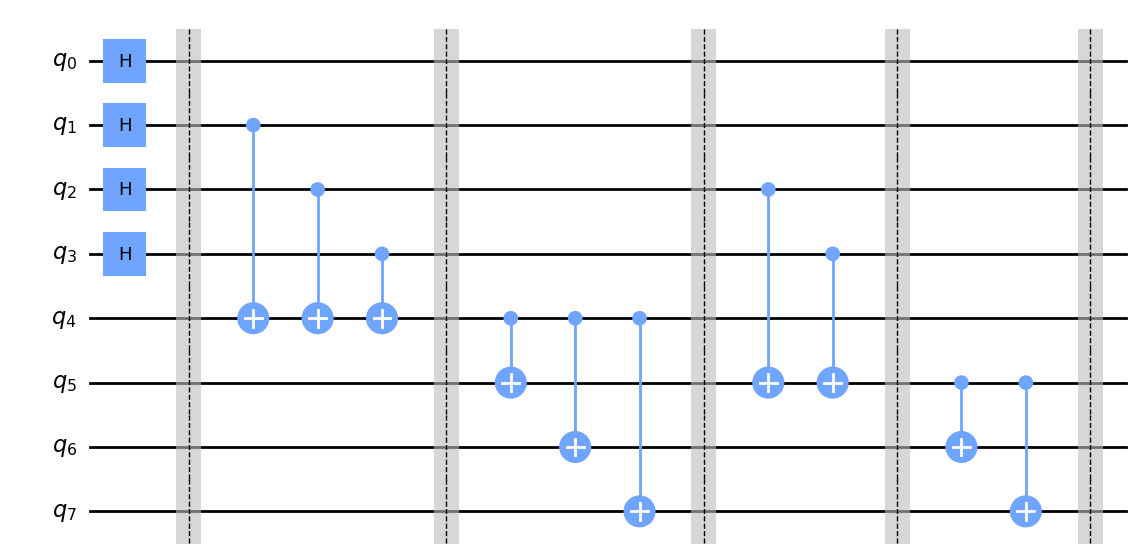

In [4]:
# on réitere les deux dernier partit mais cette fois pour la prise d'information et le partage de la reponse du participant 2

enig.cx(2,5)
enig.cx(3,5)


enig.barrier()

enig.cx(5,6)
enig.cx(5,7)

enig.barrier()

enig.draw('mpl')

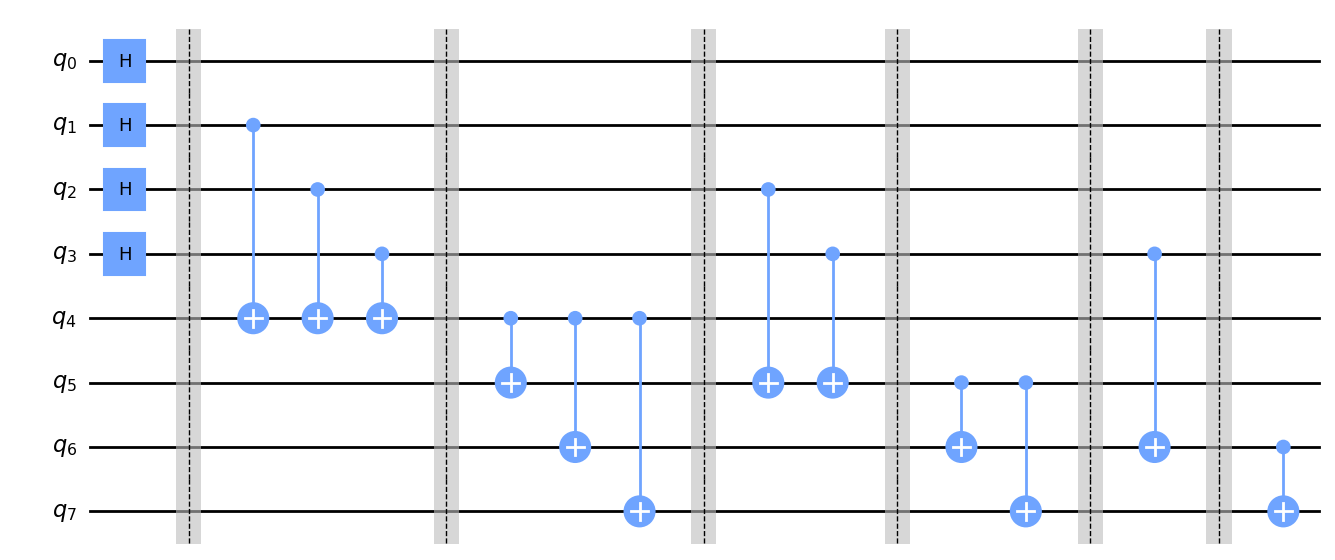

In [5]:
# et on réitere enfin le meme procéder pour le participant 3
enig.cx(3,6)


enig.barrier()

enig.cx(6,7)

# et donc le participant en deduis ca reponse
enig.draw('mpl')

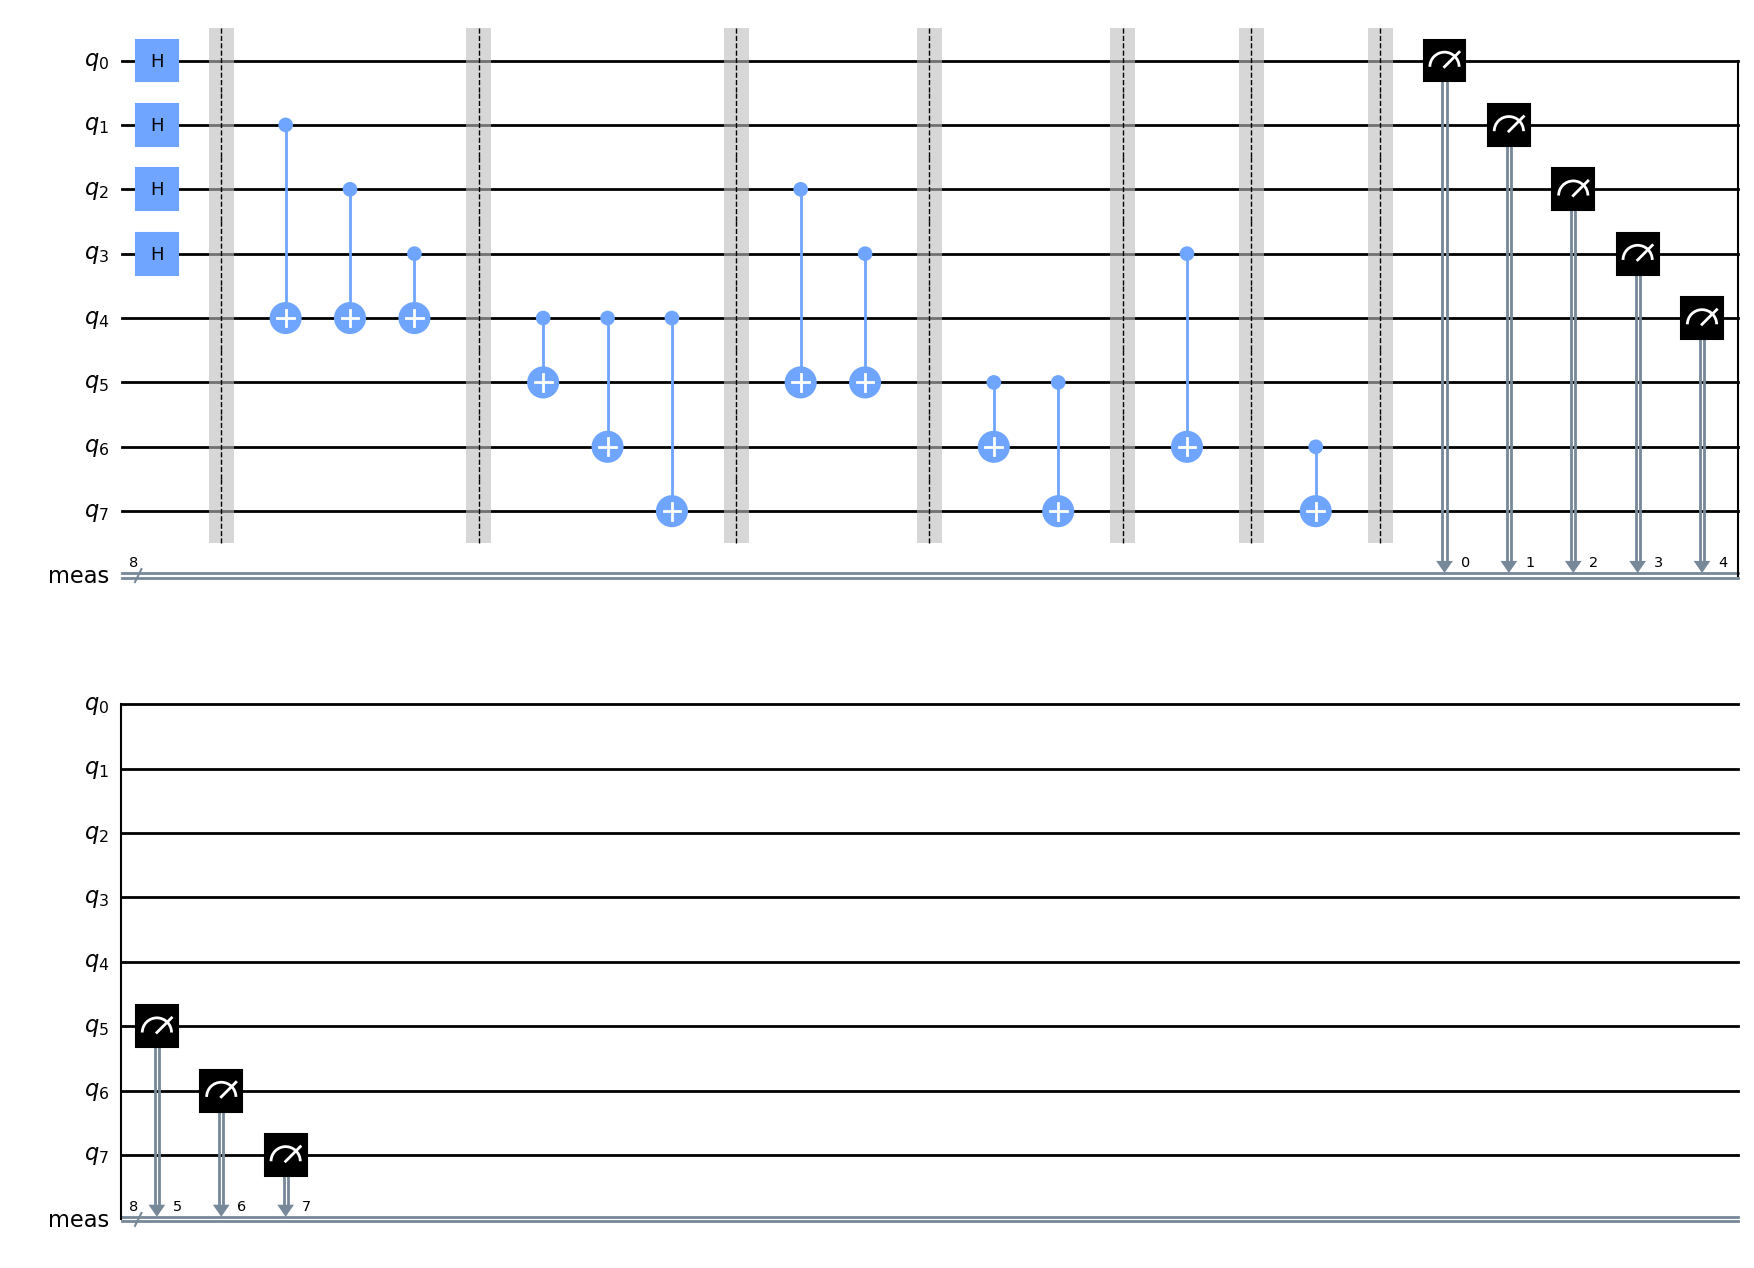

In [6]:
# on ajoute des prise de mesure sur chaque Qbit pour voir le resultat
enig.measure_all() 
enig.draw('mpl')

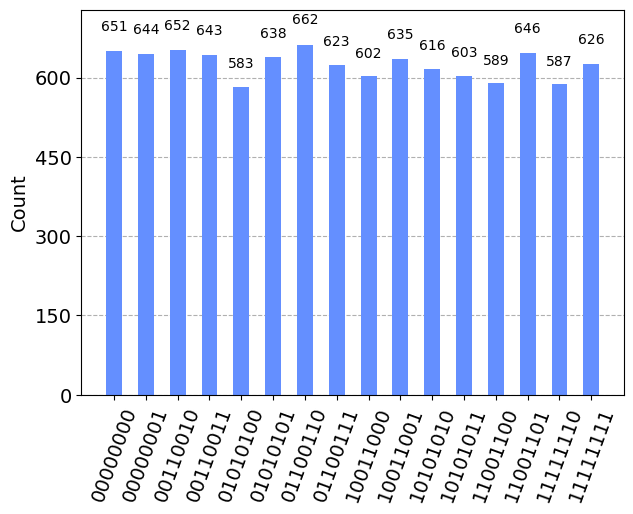

In [7]:
#on faire un compte de 10000 itération pour avoir un échantillon large et étudier les résultats
from qiskit import Aer
from qiskit.visualization import plot_histogram
meas = QuantumCircuit(8,8)
meas.measure([0, 1, 2,3,4,5,6,7], [0, 1, 2,3,4,5,6,7])

backend = BasicAer.get_backend('qasm_simulator')
enig = enig.compose(meas)
result = backend.run(transpile(enig, backend), shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

# **Interprétation des résultats**

On voit que les résultat sont répartit de maniere uniforme, il n'y a pas de réponse qui sort du lot, ce qui est normal car on part de valeur aléatoire avec les porte Hadamard

Pour rappel on lit les Qbit de droite a gauche donc le Qbit le plus a droite est le Qbit0 et le plus à gauche le Qbit7

On peut observer que sur chaque résultats, les Qbit 1 à 3 sont identique au Qbit 5 à 7.
Cela signifie que en prenant la signification de chaque Qbit on observe que les trois dernier participant on toujours raison sur la couleur de leur teinture

De plus on peut ranger les résaultat deux par deux, car on observe que deux part deux, les Qbit sont les meme à l'exemption du premier
Cela nous montre qu'a chaque fois on à au moins trois bonne réponse sur 4 et que la derniere bonne réponse est déterminer à 50% par la réponse du premier participant.